# Postwork 3. Exploración de Variables Categóricas y Análisis Multivariable

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [4]:
#Importamos primero nuestro dataset
df = pd.read_csv('/content/COVID-19 Survey Student Responses-clean.csv', index_col=0)
df.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


## Identifica las variables categóricas

In [5]:
df_cat = df.select_dtypes('object')
df_cat.head()

,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,Emotional connections,What you miss the most
0,Delhi-NCR,Good,Laptop/Desktop,Linkedin,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,Excellent,Smartphone,Youtube,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,Very poor,Laptop/Desktop,Linkedin,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,Very poor,Smartphone,Instagram,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,Good,Laptop/Desktop,Instagram,Remain Constant,NO,Social Media,NO,NO,Travelling


## Exploración de variables categóricas

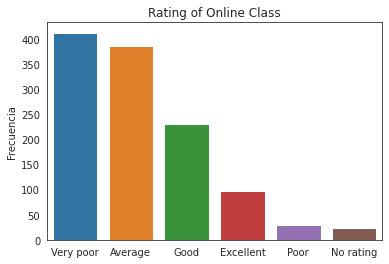

In [6]:
counts = df['Rating of Online Class experience'].value_counts()
ax = sns.barplot(x=counts.index, y=counts, order=counts.index)
ax.set_title('Rating of Online Class')
ax.set(ylabel='Frecuencia');

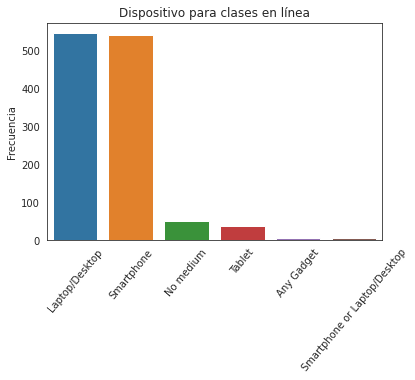

In [7]:
counts = df['Medium for online class'].value_counts()
ax = sns.barplot(x=counts.index, y=counts, order=counts.index)
ax.set_title('Dispositivo para clases en línea')
ax.set(ylabel='Frecuencia');
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

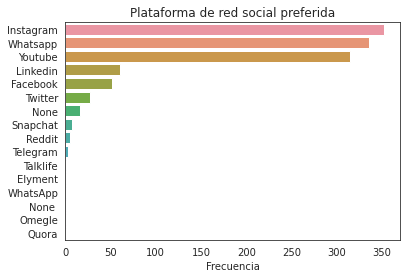

In [13]:
counts = df['Prefered social media platform'].value_counts()
ax = sns.barplot(x=counts, y=counts.index, order=counts.index, orient='h')
ax.set_title('Plataforma de red social preferida')
ax.set(xlabel='Frecuencia');

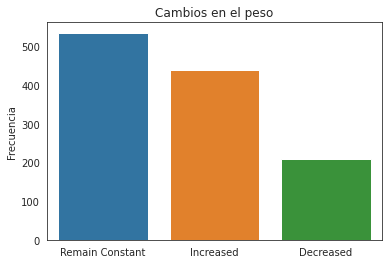

In [14]:
counts = df['Change in your weight'].value_counts()
ax = sns.barplot(x=counts.index, y=counts, order=counts.index)
ax.set_title('Cambios en el peso')
ax.set(ylabel='Frecuencia');

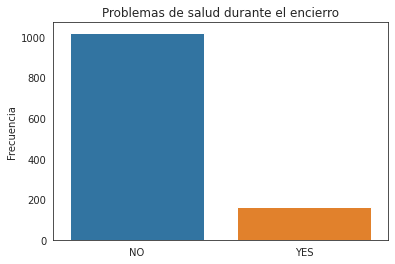

In [15]:
counts = df['Health issue during lockdown'].value_counts()
ax = sns.barplot(x=counts.index, y=counts, order=counts.index)
ax.set_title('Problemas de salud durante el encierro')
ax.set(ylabel='Frecuencia');

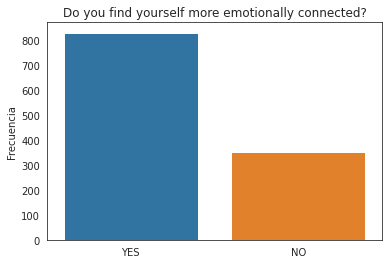

In [17]:
counts = df['Emotional connections'].value_counts()
ax = sns.barplot(x=counts.index, y=counts, order=counts.index)
ax.set_title('Do you find yourself more emotionally connected?')
ax.set(ylabel='Frecuencia');

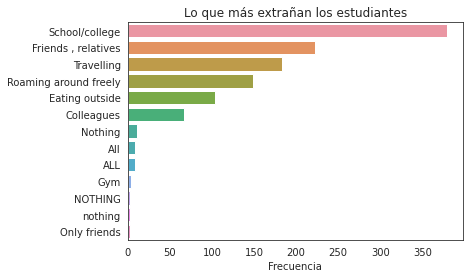

In [60]:
counts = df['What you miss the most'].value_counts()
counts = counts[counts >=2]
ax = sns.barplot(x=counts, y=counts.index, order=counts.index, orient='h')
ax.set_title('Lo que más extrañan los estudiantes')
ax.set(xlabel='Frecuencia');

## Tablas de contingencia y gráfico de múltiples ejes

In [70]:
crosstab1 = pd.crosstab(df['Medium for online class'], df['Rating of Online Class experience'])
pd.crosstab(df['Medium for online class'], df['Rating of Online Class experience'], margins=True, margins_name='Total')

Rating of Online Class experience,Average,Excellent,Good,No rating,Poor,Very poor,Total
Medium for online class,,,,,,,
Any Gadget,1,0,3,0,0,1,5
Laptop/Desktop,199,43,110,0,11,182,545
No medium,10,2,7,24,0,8,51
Smartphone,169,46,95,0,18,211,539
Smartphone or Laptop/Desktop,1,2,1,0,1,0,5
Tablet,7,5,14,0,0,11,37
Total,387,98,230,24,30,413,1182


In [72]:
crosstab2 = pd.crosstab(df['Change in your weight'], df['Health issue during lockdown'])
pd.crosstab(df['Change in your weight'], df['Health issue during lockdown'], margins=True, margins_name='total')

Health issue during lockdown,NO,YES,total
Change in your weight,,,
Decreased,159,50,209
Increased,379,59,438
Remain Constant,483,52,535
total,1021,161,1182


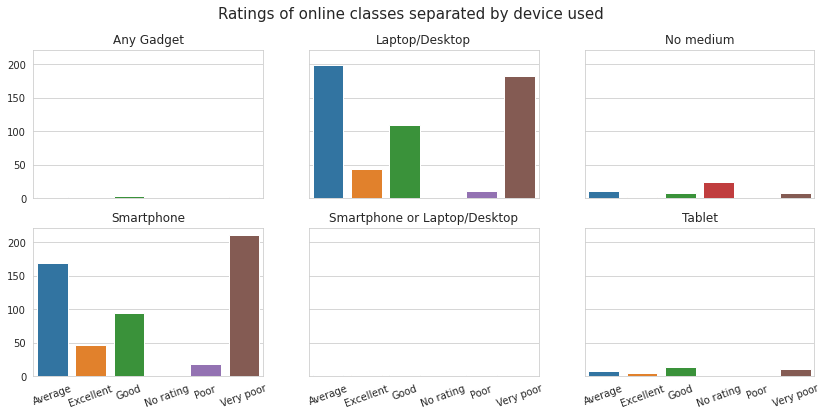

In [71]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True, sharey=True)

x= crosstab1.columns
n=0

for i in range(2):
  for j in range(3):
    ax = sns.barplot(x=x, y=crosstab1.iloc[n], ax=axes[i, j])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
    axes[i,j].set(xlabel='', ylabel='', title= crosstab1.index.values[n])
    n+=1

fig.suptitle('Ratings of online classes separated by device used', fontsize=15);

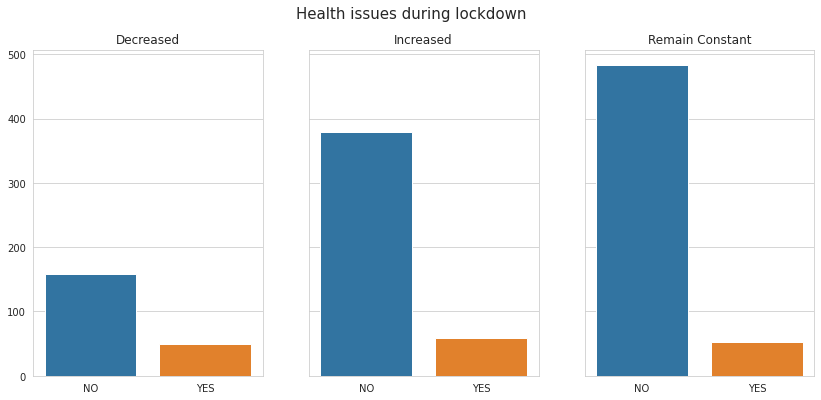

In [87]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharey=True)

x= crosstab2.columns
n=0

for j in range(3):
  ax = sns.barplot(x=x, y=crosstab2.iloc[n], ax=axes[j])
  axes[j].set(xlabel='', ylabel='', title= crosstab2.index.values[n])
  n+=1

fig.suptitle('Health issues during lockdown', fontsize=15);

## Boxplots y violinplots

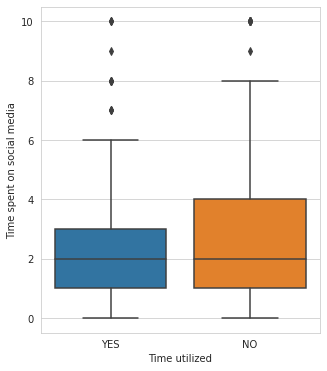

In [88]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, y='Time spent on social media', x='Time utilized');
#Time utilized se refiere a si siente que usa el tiempo eficientemente

Aquellas personas que pasan más tiempo en las redes sociales respondieron que no aprovechan el tiempo más veces que las que aquellas que pasan menos tiempo en redes.

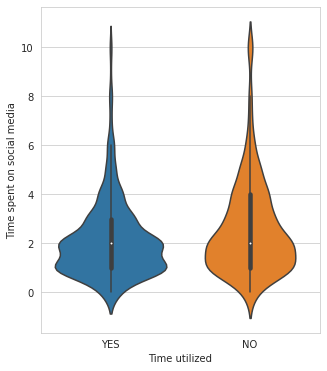

In [89]:
plt.figure(figsize=(5, 6))
sns.violinplot(data=df, x='Time utilized', y='Time spent on social media');

El violinplot nos muestra que el valor de la mediana es el mismo para ambas respuestas, pero el rango intercuartílico del grupo que pasa más tiempo en redes sociales se extiende hasta 4 horas, mientras que para el otro grupo se concentra entre 1 y 3 horas.

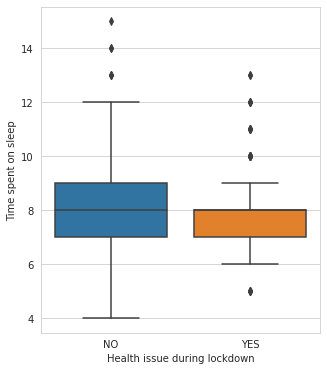

In [92]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, y='Time spent on sleep', x='Health issue during lockdown');

La gente que duerme más horas parece tener menos problemas de salud

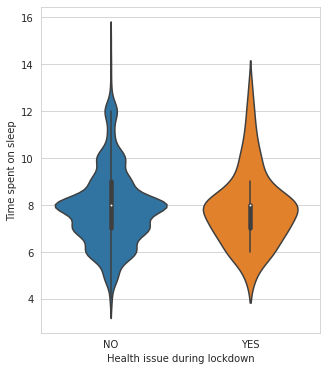

In [93]:
plt.figure(figsize=(5, 6))
sns.violinplot(data=df, x='Health issue during lockdown', y='Time spent on sleep');

Parece que hay más gente durmiendo menos de 6 horas teniendo problemas de salud

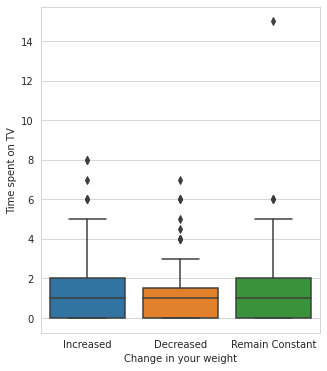

In [94]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df, y='Time spent on TV', x='Change in your weight');

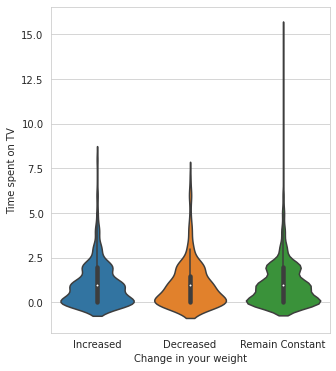

In [95]:
plt.figure(figsize=(5, 6))
sns.violinplot(data=df, x='Change in your weight', y='Time spent on TV');

No notamos una diferencia apreciable entre la gente que miró más horas de TV y los que ganaron o perdieron peso.